In [19]:
#import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df1 = pd.read_csv(r"C:\Users\mfaso\Downloads\workspace_summary_train.csv")
df2 = pd.read_csv(r"C:\Users\mfaso\Downloads\student_scores_train.csv")
df1.head()

,Anon.Student.Id,workspace_started_on,workspace_ended_on,workspace_total_time_seconds,workspace,workspace_variant,workspace_type,workspace_progress_status,step_by_step_problems_completed,problems_completed,max_problem_count,hint_count,error_count,skills_encountered,skills_mastered,aplse_earned,aplse_possible
0,stu_CWKUM29169,2025-04-03T18:12:53Z,2025-04-30T17:32:10Z,1587,graphs_of_functions-1,empty-variant,Mastery,GRADUATED,0.0,4.0,25,0.0,5.0,8.0,8.0,14.2927,14.5
1,stu_YZPQD04871,2024-11-01T12:12:09Z,2024-11-01T16:38:11Z,307,multiple_representations_of_linear_functions,empty-variant,Concept Builder,GRADUATED,0.0,4.0,4,4.0,34.0,0.0,0.0,0.9938,1.3
2,stu_RLOUO28288,2024-12-02T12:58:54Z,2024-12-02T13:11:05Z,731,analyzing_models_2step_rationals,empty-variant,Mastery,GRADUATED,1.0,12.0,25,0.0,26.0,5.0,5.0,6.4153,7.4
3,stu_TCAUQ47080,2024-12-10T16:25:08Z,2024-12-10T19:21:02Z,1248,analyzing_models_2step_rationals,empty-variant,Mastery,GRADUATED,1.0,9.0,25,0.0,29.0,5.0,5.0,6.1686,7.4
4,stu_TCAUQ47080,2024-12-10T16:25:08Z,2024-12-10T19:21:02Z,1248,analyzing_models_2step_rationals,empty-variant,Mastery,GRADUATED,1.0,9.0,25,0.0,29.0,5.0,5.0,6.1686,7.4


In [21]:
df2.head()

,Anon.Student.Id,PreMeta,Post1Meta,Post2Meta,Post3Meta,PreSE,Post1SE,Post2SE,Post3SE,PreMAP,Post1MAP,Post2MAP,Post3MAP,PreMath,PostMath
0,stu_ALKXT72745,4.1,4.1,NaN,4.2,5.250,5.250,NaN,5.75,5.000000,5.000000,NaN,4.666667,0.783555,0.148037
1,stu_BJHGT69384,5.3,5.3,5.4,4.8,5.875,5.875,6.0,6.00,5.666667,5.666667,5.333333,6.000000,0.700678,0.477070
2,stu_BOYXR98395,3.7,3.7,NaN,NaN,2.875,2.875,NaN,NaN,4.000000,4.000000,NaN,NaN,0.825437,0.533100
3,stu_ECSHD18730,5.9,5.9,6.4,6.2,6.875,6.875,6.5,6.25,6.333333,6.333333,6.666667,7.000000,0.745424,0.705654
4,stu_FSEGF69160,5.2,5.2,5.2,4.6,4.625,4.625,6.0,4.50,5.500000,5.500000,6.000000,6.000000,0.486843,0.559299


In [22]:
dfmerge = pd.merge(df1, df2, on = "Anon.Student.Id")
dfmerge.head()

,Anon.Student.Id,workspace_started_on,workspace_ended_on,workspace_total_time_seconds,workspace,workspace_variant,workspace_type,workspace_progress_status,step_by_step_problems_completed,problems_completed,...,PreSE,Post1SE,Post2SE,Post3SE,PreMAP,Post1MAP,Post2MAP,Post3MAP,PreMath,PostMath
0,stu_CWKUM29169,2025-04-03T18:12:53Z,2025-04-30T17:32:10Z,1587,graphs_of_functions-1,empty-variant,Mastery,GRADUATED,0.0,4.0,...,NaN,NaN,7.0,5.75,NaN,NaN,7.0,6.0,0.596965,0.75714
1,stu_CWKUM29169,2025-05-22T14:17:06Z,2025-05-22T14:20:43Z,216,multiple_representations_of_linear_functions,empty-variant,Concept Builder,GRADUATED,0.0,4.0,...,NaN,NaN,7.0,5.75,NaN,NaN,7.0,6.0,0.596965,0.75714
2,stu_CWKUM29169,2025-01-23T23:58:10Z,2025-01-25T18:57:10Z,9962,graph_setup_linear_equation-1,empty-variant,Mastery,GRADUATED,1.0,15.0,...,NaN,NaN,7.0,5.75,NaN,NaN,7.0,6.0,0.596965,0.75714
3,stu_CWKUM29169,2025-01-23T23:58:10Z,2025-01-25T18:57:10Z,9962,graph_setup_linear_equation-1,empty-variant,Mastery,GRADUATED,1.0,15.0,...,NaN,NaN,7.0,5.75,NaN,NaN,7.0,6.0,0.596965,0.75714
4,stu_CWKUM29169,2025-01-31T18:56:45Z,2025-01-31T18:59:48Z,182,solve_linear_equation_similar_terms_constant_d...,empty-variant,Mastery,GRADUATED,1.0,4.0,...,NaN,NaN,7.0,5.75,NaN,NaN,7.0,6.0,0.596965,0.75714


In [24]:
print(dfmerge.columns)

Index(['Anon.Student.Id', 'workspace_started_on', 'workspace_ended_on',
       'workspace_total_time_seconds', 'workspace', 'workspace_variant',
       'workspace_type', 'workspace_progress_status',
       'step_by_step_problems_completed', 'problems_completed',
       'max_problem_count', 'hint_count', 'error_count', 'skills_encountered',
       'skills_mastered', 'aplse_earned', 'aplse_possible', 'PreMeta',
       'Post1Meta', 'Post2Meta', 'Post3Meta', 'PreSE', 'Post1SE', 'Post2SE',
       'Post3SE', 'PreMAP', 'Post1MAP', 'Post2MAP', 'Post3MAP', 'PreMath',
       'PostMath'],
      dtype='object')


In [26]:
agg_dfmerge = dfmerge.groupby("Anon.Student.Id").agg({'workspace_total_time_seconds': 'sum',
    'step_by_step_problems_completed': 'sum', 'problems_completed': 'sum',
    'hint_count': 'sum', 'error_count': 'sum', 'skills_encountered': 'sum',
    'skills_mastered': 'sum', 'aplse_earned': 'sum', 'aplse_possible': 'sum',
    'PreMath': 'first', 'PostMath': 'first'}).reset_index()

In [27]:
agg_dfmerge['skills'] = agg_dfmerge['skills_mastered'] / agg_dfmerge['skills_encountered'].replace(0, np.nan)
agg_dfmerge['aplse'] = agg_dfmerge['aplse_earned'] / agg_dfmerge['aplse_possible'].replace(0, np.nan)

In [29]:
agg_dfmerge = agg_dfmerge.fillna(0)
agg_dfmerge.head()

,Anon.Student.Id,workspace_total_time_seconds,step_by_step_problems_completed,problems_completed,hint_count,error_count,skills_encountered,skills_mastered,aplse_earned,aplse_possible,PreMath,PostMath,skills,aplse
0,stu_AAUBF17657,37047,1.0,129.0,159.0,625.0,101.0,101.0,213.0938,258.1,0.826926,0.717312,1.000000,0.825625
1,stu_AEMVA51138,3306,0.0,12.0,3.0,51.0,0.0,0.0,2.8836,3.3,0.000000,0.000000,0.000000,0.873818
2,stu_AFTLH68875,268690,0.0,1090.0,775.0,4365.0,690.0,675.0,1062.3540,1659.5,0.494946,0.859843,0.978261,0.640165
3,stu_AJOQB67917,54587,1.0,126.0,207.0,877.0,47.0,43.0,23.3835,95.6,0.191154,0.058525,0.914894,0.244597
4,stu_AKCKU56345,68150,12.0,420.0,146.0,1620.0,276.0,276.0,567.8022,663.8,0.885731,0.851924,1.000000,0.855381


In [32]:
features = ['workspace_total_time_seconds', 'step_by_step_problems_completed', 
            'problems_completed', 'hint_count', 'error_count', 'skills', 'aplse']

X = agg_dfmerge[features]
y = agg_dfmerge['PostMath']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"MAE: {mae: .4f}")
#model = RandomForestRegressor(random_state=42)
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

RMSE: 0.2362
R^2: 0.4360
MAE:  0.1841


<function matplotlib.pyplot.show(close=None, block=None)>

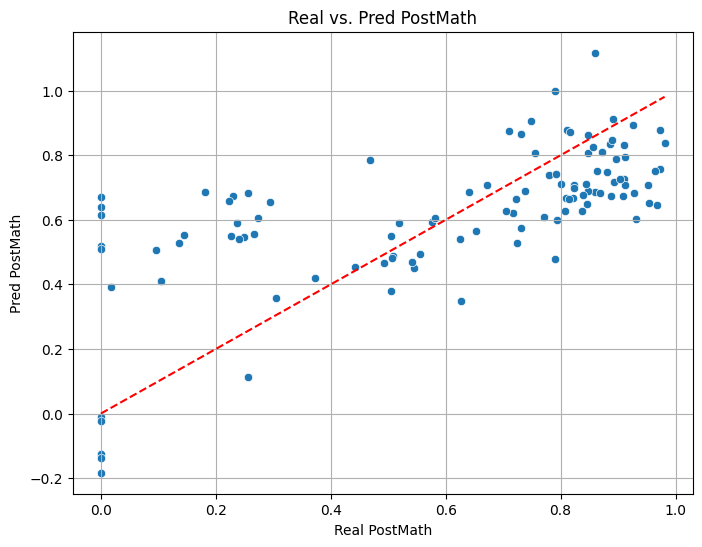

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Real PostMath")
plt.ylabel("Pred PostMath")
plt.title("Real vs. Pred PostMath")
plt.grid(True)
plt.show